In [1]:
from google.colab import files
uploaded = files.upload()

Saving GEDEvent_v25_1.csv to GEDEvent_v25_1.csv


In [2]:
import pandas as pd


df = pd.read_csv('GEDEvent_v25_1.csv')

# Visualizza le prime righe
df.head()


/tmp/ipython-input-1515354910.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GEDEvent_v25_1.csv')


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,True,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,True,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


In [19]:
# Conta gli eventi per anno
eventi_per_anno = df['year'].value_counts().sort_index()

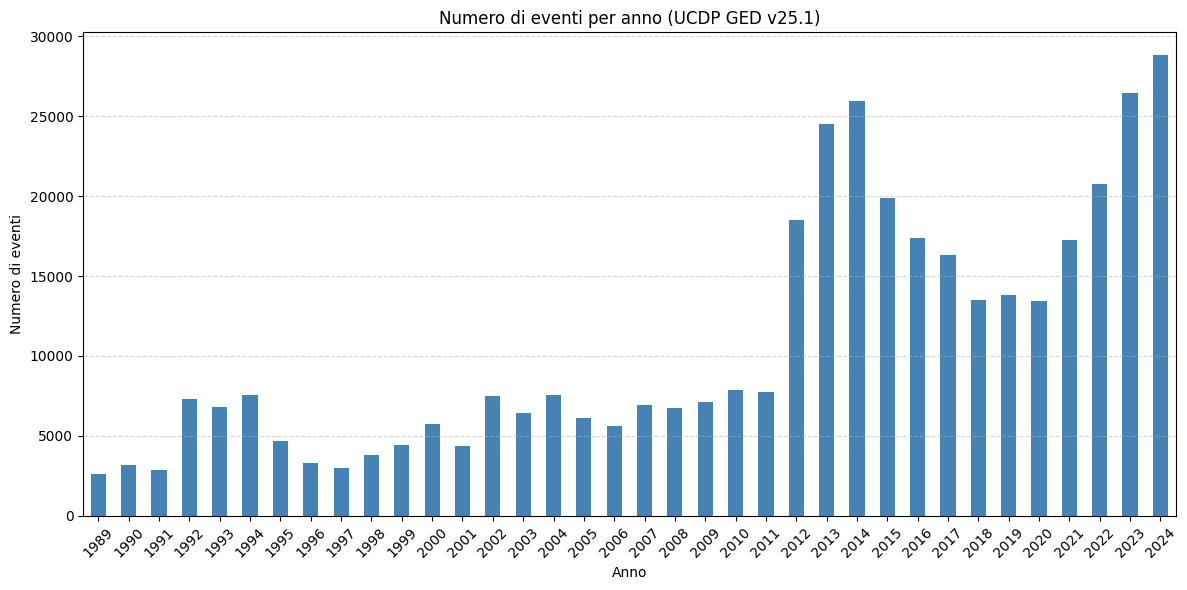

In [6]:
import matplotlib.pyplot as plt

eventi_per_anno.plot(kind='bar', figsize=(12,6), color='steelblue')
plt.title('Numero di eventi per anno (UCDP GED v25.1)')
plt.xlabel('Anno')
plt.ylabel('Numero di eventi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [7]:
# Conta quanti eventi ci sono per paese
eventi_per_paese = df['country'].value_counts()


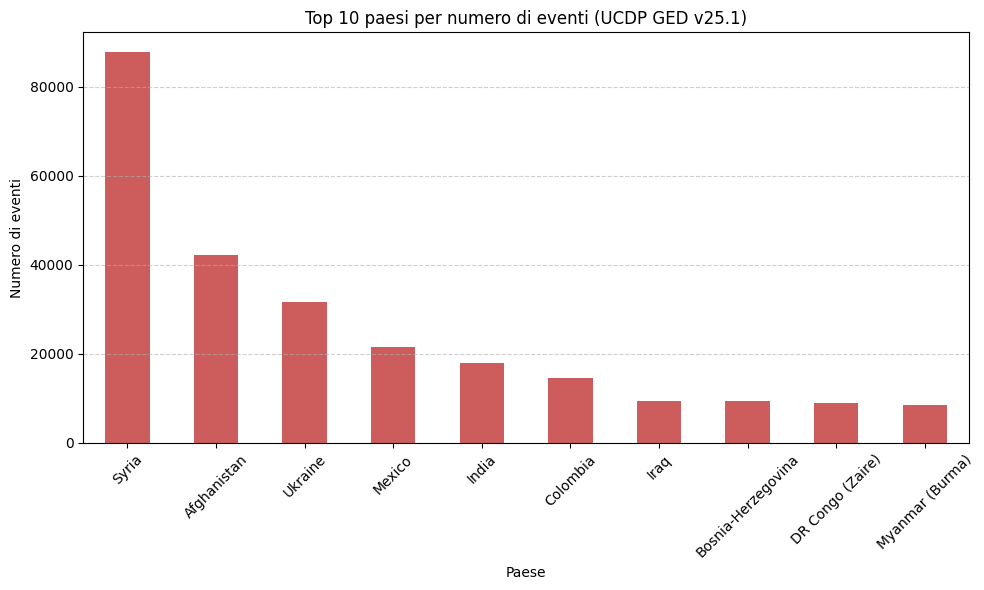

In [8]:

# Grafico dei primi 10 paesi
eventi_per_paese.head(10).plot(kind='bar', color='indianred', figsize=(10,6))
plt.title('Top 10 paesi per numero di eventi (UCDP GED v25.1)')
plt.xlabel('Paese')
plt.ylabel('Numero di eventi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [9]:
# Conta quanti eventi ci sono per regione
eventi_per_paese = df['region'].value_counts()

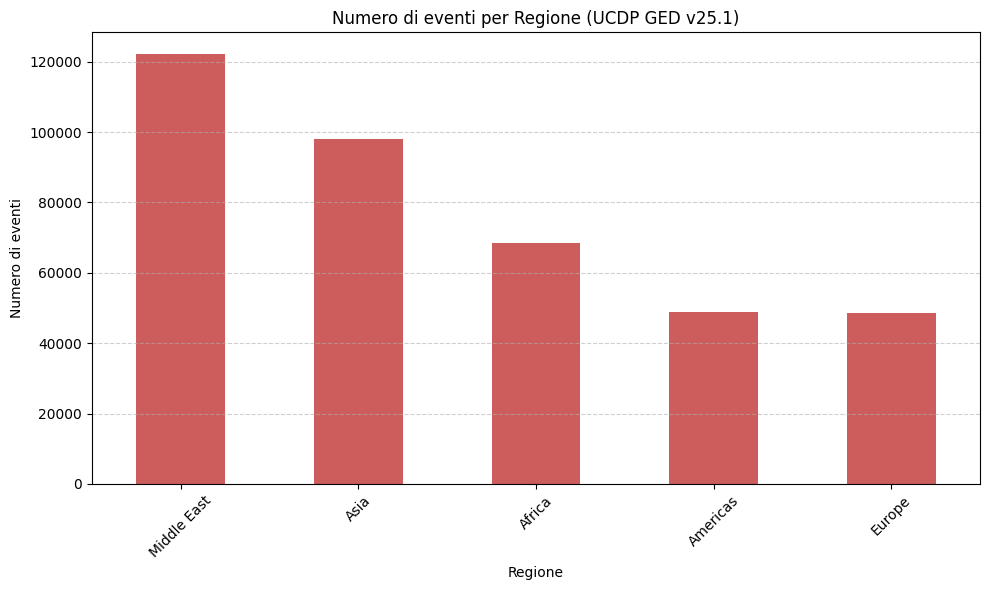

In [10]:

# Grafico
eventi_per_paese.plot(kind='bar', color='indianred', figsize=(10,6))
plt.title('Numero di eventi per Regione (UCDP GED v25.1)')
plt.xlabel('Regione')
plt.ylabel('Numero di eventi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [11]:
# Somma delle morti per anno (best estimate)
morti_per_anno = df.groupby('year')['best'].sum()


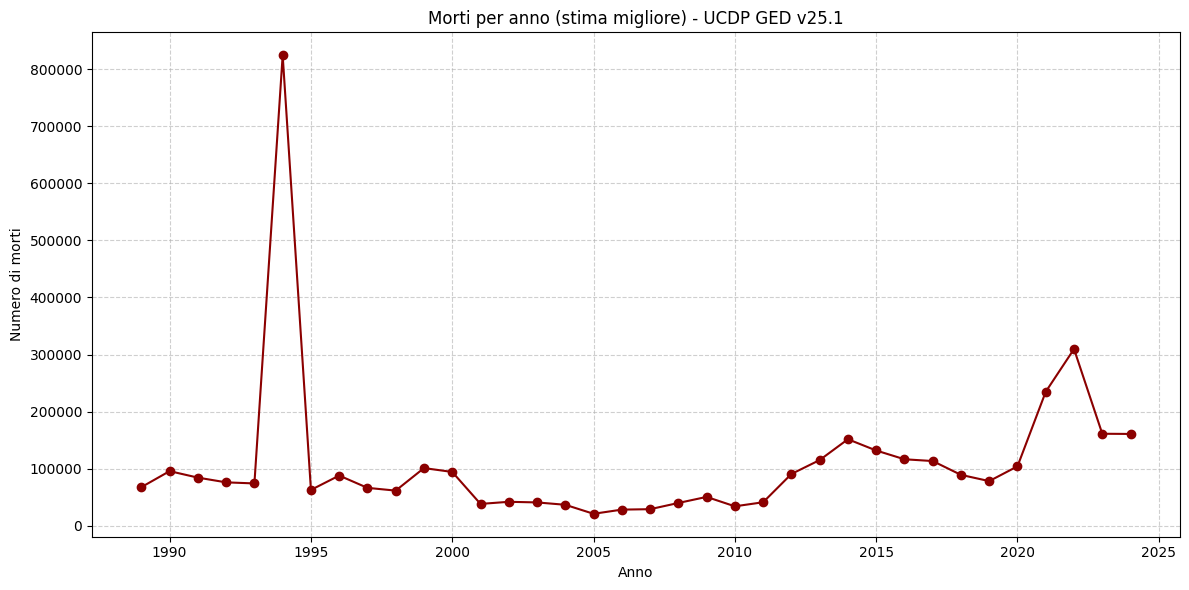

In [12]:
morti_per_anno.plot(kind='line', figsize=(12,6), marker='o', color='darkred')
plt.title('Morti per anno (stima migliore) - UCDP GED v25.1')
plt.xlabel('Anno')
plt.ylabel('Numero di morti')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

| Codice | Tipo di violenza     | Attori coinvolti                 | Esempio                    |
| :----: | -------------------- | -------------------------------- | -------------------------- |
|  **1** | State-based conflict | Stato vs Stato / Stato vs gruppo | Ucraina vs Russia          |
|  **2** | Non-state conflict   | Gruppo vs Gruppo (no Stato)      | Milizie rivali in Nigeria  |
|  **3** | One-sided violence   | Stato o gruppo vs civili         | Attacchi a civili in Siria |


In [42]:
violence_map = {
    1: "State-based conflict",
    2: "Non-state conflict",
    3: "One-sided violence"
}
df['violence_type'] = df['type_of_violence'].map(violence_map)

eventi_per_anno_tipo = df.groupby(['year', 'violence_type'])['id'].count().sort_index()


In [ ]:
events_pivot = eventi_per_anno_tipo.unstack(fill_value=0)
events_pivot.head()


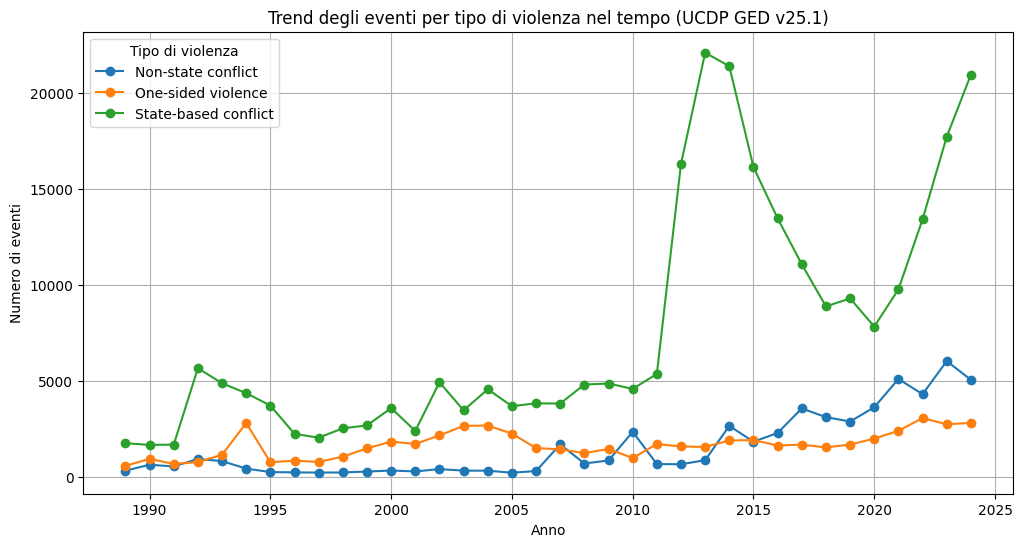

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for col in events_pivot.columns:
    plt.plot(events_pivot.index, events_pivot[col], marker='o', label=col)

plt.title("Trend degli eventi per tipo di violenza nel tempo (UCDP GED v25.1)")
plt.xlabel("Anno")
plt.ylabel("Numero di eventi")
plt.legend(title="Tipo di violenza")
plt.grid(True)
plt.show()


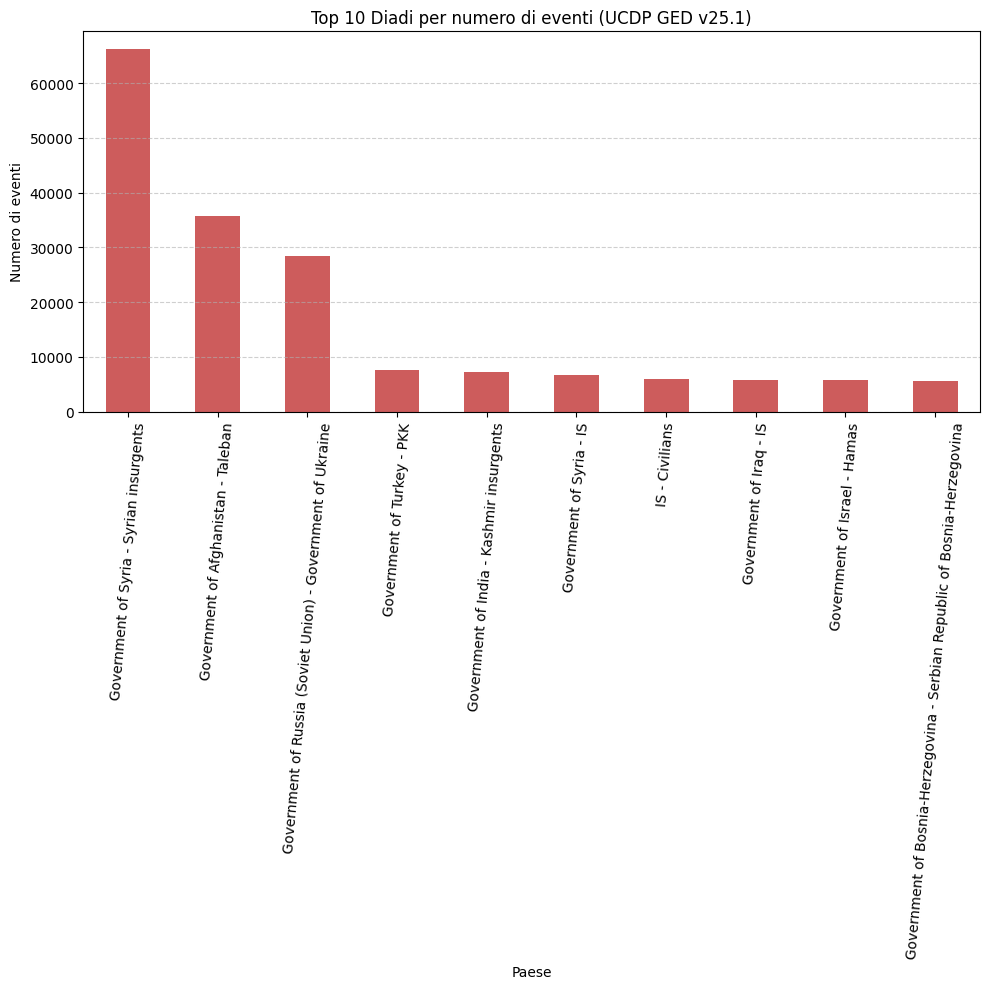

In [67]:
eventi_per_diade = df['dyad_name'].value_counts()
eventi_per_diade.head(10).plot(kind='bar', color='indianred', figsize=(10,10))
plt.title('Top 10 Diadi per numero di eventi (UCDP GED v25.1)')
plt.xlabel('Paese')
plt.ylabel('Numero di eventi')
plt.xticks(rotation=85)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


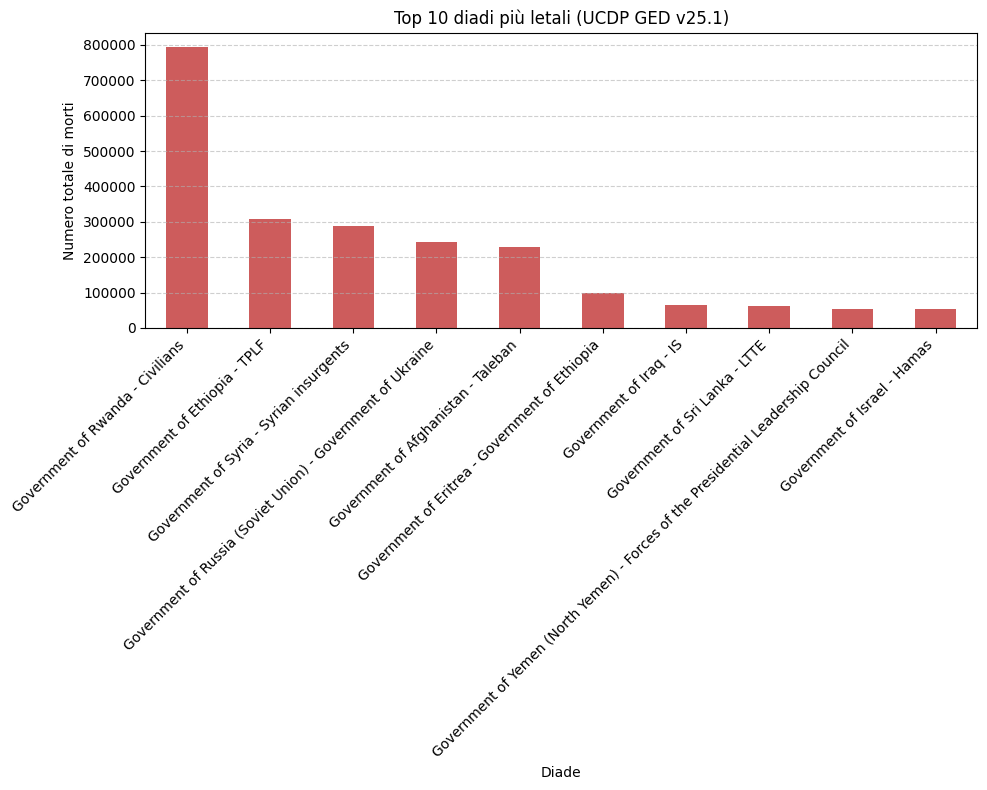

In [83]:
morti_per_diade = df.groupby('dyad_name')['best'].sum()

morti_per_diade.sort_values(ascending=False).head(10).plot(kind='bar', color='indianred', figsize=(10,8))
plt.title('Top 10 diadi più letali (UCDP GED v25.1)')
plt.xlabel('Diade')
plt.ylabel('Numero totale di morti')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In [87]:
df_israel = df[df['country'] == 'Israel']



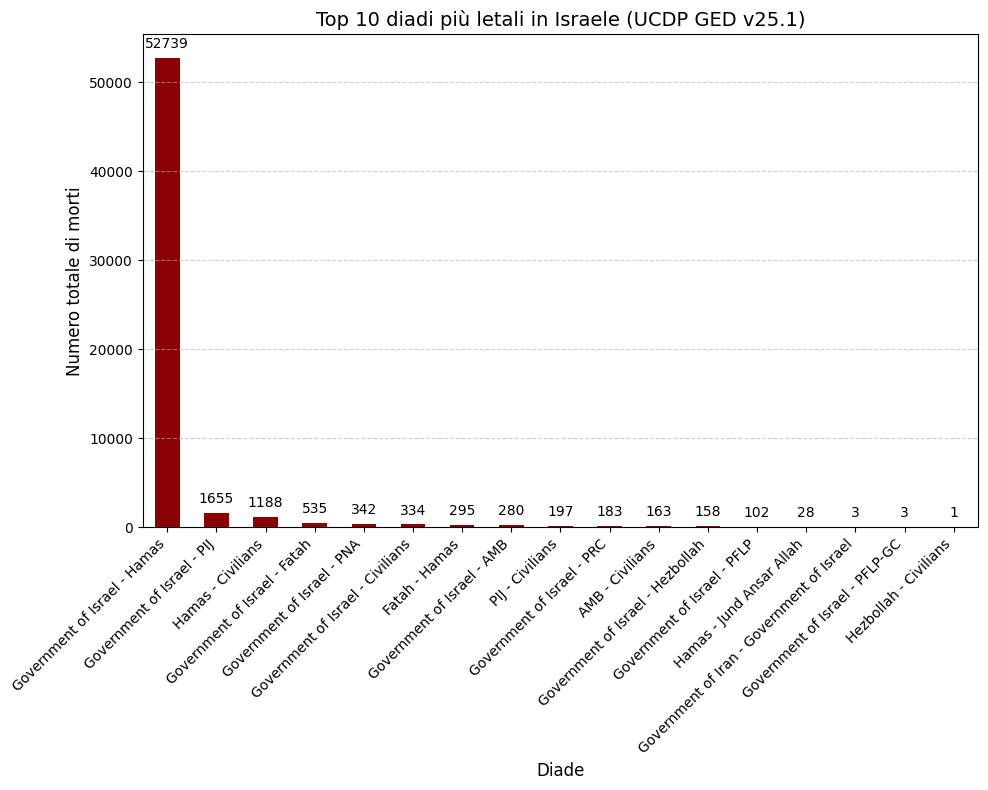

In [106]:
morti_per_diade_israel = df_israel.groupby('dyad_name')['best'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
bars = morti_per_diade_israel.plot(kind='bar', color='darkred')
plt.title('Top 10 diadi più letali in Israele (UCDP GED v25.1)', fontsize=14)
plt.xlabel('Diade', fontsize=12)
plt.ylabel('Numero totale di morti', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}',  # testo dell'etichetta
                  xy=(bar.get_x() + bar.get_width() / 2, height),  # posizione
                  xytext=(0, 5),  # spostamento verticale
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()